In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
sns.set_style('ticks')
np.random.seed(123)

In [2]:
def gillespie_step(x,dt,beta,gamma, mu):
    # matrix of reactions
    rates=np.zeros((6))
    mod_matrix=np.zeros((6,3))
    mod_matrix[0,:]=([-1, +1, 0])
    mod_matrix[1,:]=([0, -1, +1])
    mod_matrix[2,:]=([+1, 0, 0])
    mod_matrix[3,:]=([-1, 0, 0])
    mod_matrix[4,:]=([0, -1, 0])
    mod_matrix[5,:]=([0, 0, -1])
    # first we calculate the rates of processes
    N = x[0] + x[1] + x[2]
    rates[0] = beta*x[0]*x[1]/N # infection
    rates[1] = gamma*x[1] # recovery
    rates[2] = mu*N # birth of susceptible 
    rates[3] = mu*x[0] # death of sucsceptible
    rates[4] = mu*x[1] # death of infected
    rates[5] = mu*x[2] # death of recovered
    for i in range(6):
        mod_i = np.random.poisson(rates[i]*dt)
        real_mod_i = min([mod_i,x[np.where(mod_matrix[i,:]<0)]])
        x = x + mod_matrix[i,:]*real_mod_i
    return x

In [3]:
def gillespie_total(x,dt,Tmax,beta,gamma,mu):
    t_curr = 0
    t = []
    res = []
    t.append(t_curr)
    res.append(x)
    while t_curr < Tmax and x[1] > 0:
        x = gillespie_step(x,dt,beta,gamma, mu)
        t_curr = t_curr + dt
        t.append(t_curr)
        res.append(x)
    return t, res

1000


C:\Users\denis\AppData\Local\Temp\ipykernel_3984\631406084.py:21: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  real_mod_i = min([mod_i,x[np.where(mod_matrix[i,:]<0)]])


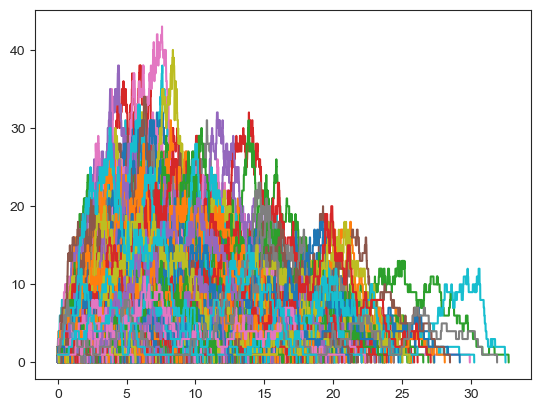

5000


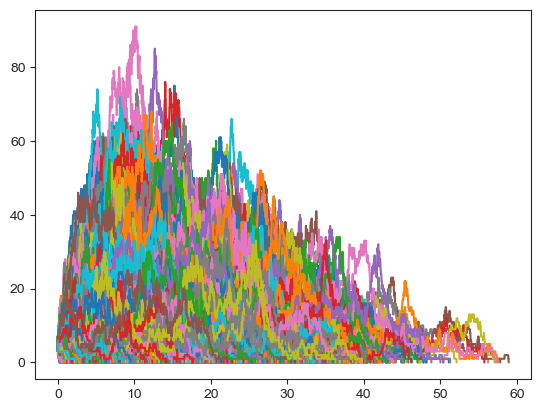

10000


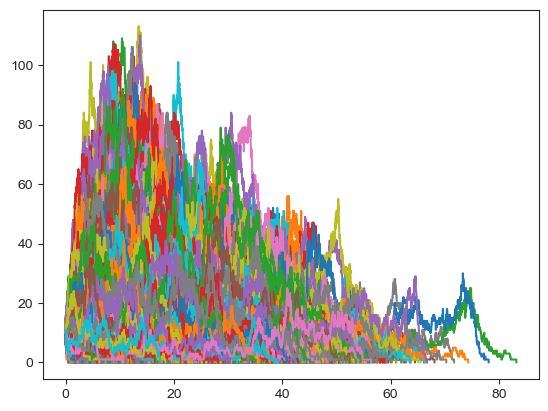

50000


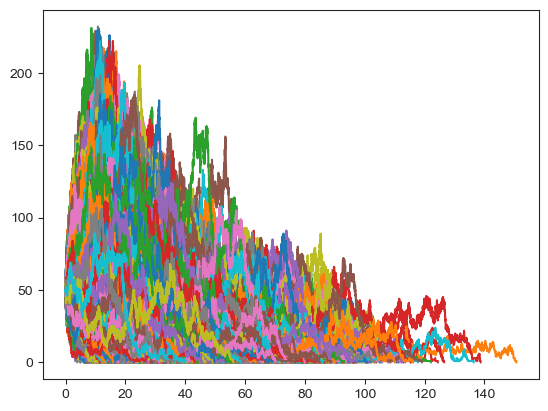

100000


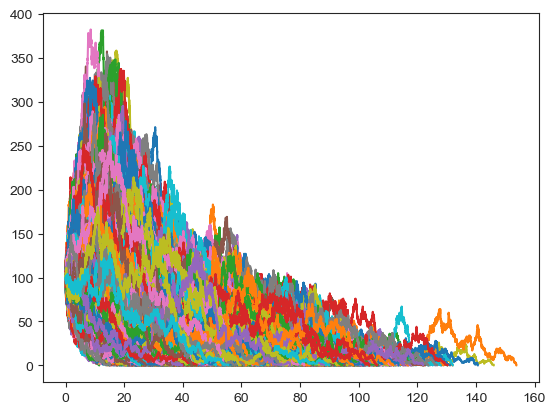

500000


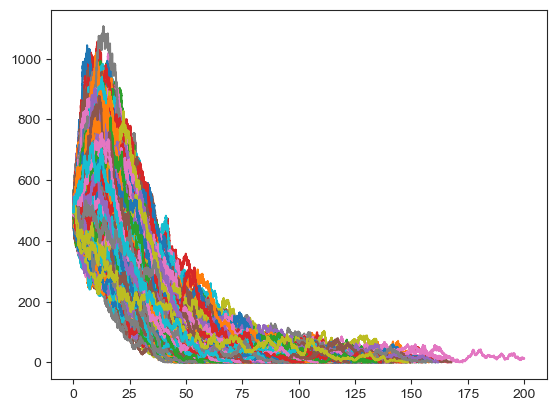

In [6]:
N_vec = [1000,5000,10000,50000,100000,500000]
beta = 3
gamma = 1
Tmax = 200
eps = 0.01
mu = 0
dt = 0.01
I0 = 0.001
R0 = 1 - (1/(beta/gamma)) - eps - I0
reps = 10000
size_list = []
time_list = []
for N in N_vec:
    print(N)
    size_list_loop = []
    time_list_loop = []
    for j in range(reps):
        x = np.array((1 - I0 - R0,I0,R0))*N
        t, res = gillespie_total(x,dt,Tmax,beta,gamma,mu)
        res = np.array([np.array(xi) for xi in res])
        R = res[:,2]
        infected = R[-1] - R0*N 
        size_list_loop.append(infected)
        time_list_loop.append(t[-1])
        plt.plot(t,res[:,1])
    plt.show()
    size_list.append(size_list_loop)
    time_list.append(time_list_loop)
    name_1 = 'GTP_fsize_'+str(I0*100)+'_'+str(eps)+'_'+str(N)+'.csv'
    name_2 = 'GTP_ftime_'+str(I0*100)+'_'+str(eps)+'_'+str(N)+'.csv'
    np.savetxt(name_1, size_list)
    np.savetxt(name_2, time_list)

In [ ]:
for i in range(len(N_vec)):
    plt.title(r'$N =$ '+str(N_vec[i]))
    bins_vec = np.arange(0,0.1,0.0025)
    plt.hist(np.array(size_list[i])/N_vec[i], bins = bins_vec, edgecolor = 'black', color = 'red')
    plt.ylabel('Frequency')
    plt.xlabel('Outbreak Size (Propotion)')
    plt.axvline(eps, color = 'k')
    plt.show()

In [ ]:
for i in range(len(N_vec)):
    plt.title(r'$N =$ '+str(N_vec[i]))
    plt.hist(np.array(time_list[i]), edgecolor = 'black', color = 'red')
    plt.ylabel('Frequency')
    plt.xlabel('Outbreak Duration')
    plt.show()